##### 5. Model Selection & Model Training

In [46]:
# import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score

In [47]:
# load the data
df = pd.read_csv('data/seeds_dataset.csv')


In [48]:
#droping the unwanted columns
df.drop(['Unnamed: 8','Unnamed: 9'],axis=1,inplace=True)

In [49]:
# separate the features and target variable
X = df.drop('Class (1, 2, 3)', axis=1)
y = df['Class (1, 2, 3)']

In [50]:
# Normalize and Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)


# Print the normalized and scaled data
print("Normalized data: \n", X)


Normalized data: 
 [[0.44098206 0.50206612 0.5707804  ... 0.48610121 0.18930164 0.34515017]
 [0.40509915 0.44628099 0.66243194 ... 0.50106914 0.03288302 0.21516494]
 [0.34938621 0.34710744 0.87931034 ... 0.50392017 0.25145302 0.1506647 ]
 ...
 [0.24645892 0.25826446 0.7277677  ... 0.42908054 0.98166664 0.26440177]
 [0.11803588 0.16528926 0.39927405 ... 0.14682823 0.36834441 0.25849335]
 [0.16147309 0.19214876 0.54718693 ... 0.24518888 0.63346292 0.26784835]]


In [51]:
# Split the dataset into features and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of models
models = [LogisticRegression(solver='lbfgs', max_iter=1000), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(random_state=42, n_jobs=-1,n_estimators=100, max_depth=3),
          GradientBoostingClassifier(), SVC(), KNeighborsClassifier(n_neighbors=5,n_jobs=-1), AdaBoostClassifier(),
          LGBMClassifier(), CatBoostClassifier(), BaggingClassifier(), ExtraTreesClassifier()]

# Define a list of model names
model_names = ["LogisticRegression", "GaussianNB", "DecisionTree", "RandomForest", "GradientBoosting", "SVM",
               "KNN", "AdaBoost", "LightGBM", "CatBoost", "Bagging", "ExtraTrees"]

# Iterate over the models
for model, model_name in zip(models, model_names):
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    

Learning rate set to 0.072246
0:	learn: 1.0120798	total: 3.75ms	remaining: 3.75s
1:	learn: 0.9468313	total: 6.29ms	remaining: 3.14s
2:	learn: 0.8982289	total: 8.89ms	remaining: 2.96s
3:	learn: 0.8485548	total: 11.4ms	remaining: 2.83s
4:	learn: 0.7979453	total: 14.8ms	remaining: 2.94s
5:	learn: 0.7553004	total: 18.7ms	remaining: 3.09s
6:	learn: 0.7147178	total: 20.3ms	remaining: 2.88s
7:	learn: 0.6796198	total: 23.3ms	remaining: 2.89s
8:	learn: 0.6518506	total: 26ms	remaining: 2.86s
9:	learn: 0.6236531	total: 29.4ms	remaining: 2.91s
10:	learn: 0.5923351	total: 36.2ms	remaining: 3.26s
11:	learn: 0.5654142	total: 85.5ms	remaining: 7.04s
12:	learn: 0.5419464	total: 101ms	remaining: 7.67s
13:	learn: 0.5202442	total: 105ms	remaining: 7.38s
14:	learn: 0.4962665	total: 108ms	remaining: 7.12s
15:	learn: 0.4771880	total: 119ms	remaining: 7.29s
16:	learn: 0.4588136	total: 148ms	remaining: 8.56s
17:	learn: 0.4443708	total: 167ms	remaining: 9.13s
18:	learn: 0.4301829	total: 171ms	remaining: 8.84s
1

In [52]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((168, 7), (42, 7))

In [53]:
results = []
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    result = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    results.append(result)

zip_file = zip(models, results)


for model, result in zip(models, results):
        y_pred = model.predict(X_test)
        np.seterr(divide='ignore', invalid='ignore')
        precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')
        print(f'{model.__class__.__name__} - precision: {precision:.2f}, recall: {recall:.2f}, fscore: {fscore:.2f}')

LogisticRegression - precision: 0.90, recall: 0.90, fscore: 0.90
GaussianNB - precision: 0.86, recall: 0.86, fscore: 0.86
DecisionTreeClassifier - precision: 0.90, recall: 0.88, fscore: 0.88
RandomForestClassifier - precision: 0.85, recall: 0.83, fscore: 0.84
GradientBoostingClassifier - precision: 0.94, recall: 0.93, fscore: 0.93
SVC - precision: 0.91, recall: 0.90, fscore: 0.91
KNeighborsClassifier - precision: 0.93, recall: 0.93, fscore: 0.93
AdaBoostClassifier - precision: 0.44, recall: 0.60, fscore: 0.48
LGBMClassifier - precision: 0.91, recall: 0.90, fscore: 0.91
CatBoostClassifier - precision: 0.88, recall: 0.86, fscore: 0.86
BaggingClassifier - precision: 0.92, recall: 0.88, fscore: 0.89
ExtraTreesClassifier - precision: 0.88, recall: 0.88, fscore: 0.88


c:\Users\HP\Downloads\WheatKernel\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\Downloads\WheatKernel\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Learning rate set to 0.072246
0:	learn: 1.0120798	total: 3.13ms	remaining: 3.13s
1:	learn: 0.9468313	total: 5.61ms	remaining: 2.8s
2:	learn: 0.8982289	total: 8.09ms	remaining: 2.69s
3:	learn: 0.8485548	total: 14.8ms	remaining: 3.68s
4:	learn: 0.7979453	total: 17.6ms	remaining: 3.5s
5:	learn: 0.7553004	total: 20.1ms	remaining: 3.33s
6:	learn: 0.7147178	total: 21.5ms	remaining: 3.05s
7:	learn: 0.6796198	total: 23.8ms	remaining: 2.95s
8:	learn: 0.6518506	total: 28.8ms	remaining: 3.17s
9:	learn: 0.6236531	total: 31.4ms	remaining: 3.11s
10:	learn: 0.5923351	total: 34ms	remaining: 3.06s
11:	learn: 0.5654142	total: 36.4ms	remaining: 2.99s
12:	learn: 0.5419464	total: 38.8ms	remaining: 2.95s
13:	learn: 0.5202442	total: 42.3ms	remaining: 2.98s
14:	learn: 0.4962665	total: 45.7ms	remaining: 3s
15:	learn: 0.4771880	total: 48.2ms	remaining: 2.96s
16:	learn: 0.4588136	total: 50.6ms	remaining: 2.92s
17:	learn: 0.4443708	total: 53ms	remaining: 2.89s
18:	learn: 0.4301829	total: 55.5ms	remaining: 2.86s
1

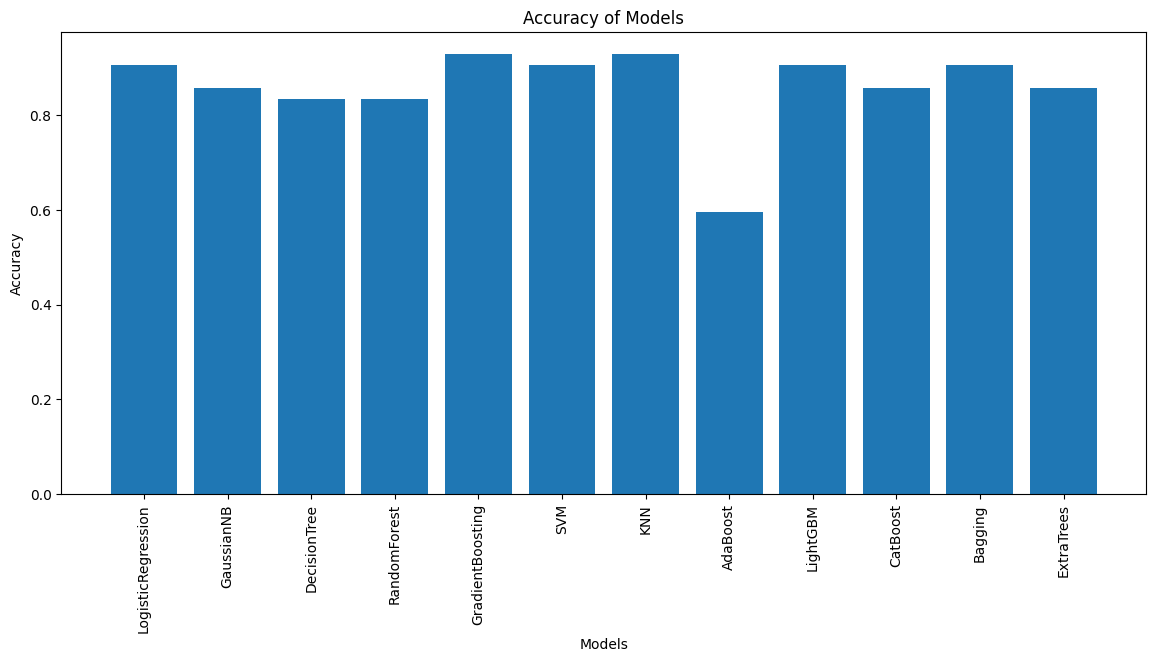

In [54]:
plt.figure(figsize=(14,6))


# Iterate over the models
accuracies = []
for model, model_name in zip(models, model_names):
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Predict the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Create the bar chart
plt.bar(model_names, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.xticks(rotation=90)
plt.show()


Learning rate set to 0.072246
0:	learn: 1.0120798	total: 2.72ms	remaining: 2.72s
1:	learn: 0.9468313	total: 5.32ms	remaining: 2.65s
2:	learn: 0.8982289	total: 7.2ms	remaining: 2.39s
3:	learn: 0.8485548	total: 9.07ms	remaining: 2.26s
4:	learn: 0.7979453	total: 11ms	remaining: 2.19s
5:	learn: 0.7553004	total: 12.8ms	remaining: 2.12s
6:	learn: 0.7147178	total: 13.8ms	remaining: 1.96s
7:	learn: 0.6796198	total: 15.6ms	remaining: 1.94s
8:	learn: 0.6518506	total: 17.4ms	remaining: 1.92s
9:	learn: 0.6236531	total: 21.1ms	remaining: 2.09s
10:	learn: 0.5923351	total: 23ms	remaining: 2.07s
11:	learn: 0.5654142	total: 24.8ms	remaining: 2.04s
12:	learn: 0.5419464	total: 26.6ms	remaining: 2.02s
13:	learn: 0.5202442	total: 28.4ms	remaining: 2s
14:	learn: 0.4962665	total: 30.2ms	remaining: 1.98s
15:	learn: 0.4771880	total: 32ms	remaining: 1.97s
16:	learn: 0.4588136	total: 34.6ms	remaining: 2s
17:	learn: 0.4443708	total: 37.1ms	remaining: 2.02s
18:	learn: 0.4301829	total: 39ms	remaining: 2.01s
19:	lea

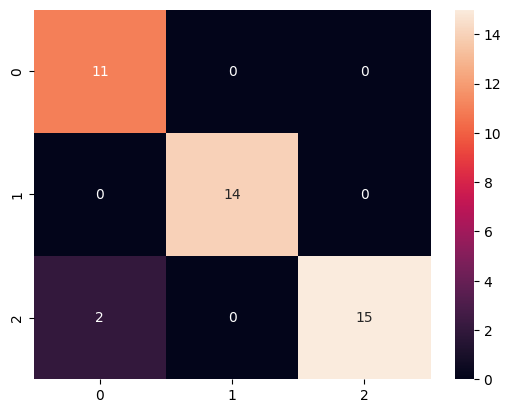

In [55]:
# Initialize variables to store precision and model name
highest_precision = 0
best_model_name = ''

# Iterate over the models
for model, model_name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    if precision > highest_precision:
        highest_precision = precision
        best_model_name = model_name
        best_model = model

# create a confusion matrix for the best model
cm = confusion_matrix(y_test, best_model.predict(X_test))
print(f'{best_model_name} - confusion matrix:')
print(cm)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()


##### Difference between Actual and Predicted Values

In [56]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
30,1,1,0
172,3,3,0
84,2,2,0
199,3,3,0
60,1,1,0
155,3,3,0
45,1,1,0
182,3,3,0
9,1,1,0
196,3,3,0
